In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


#create data drame to read data set
df = pd.read_csv('bank.csv', delimiter=';', na_values=[''])

DATASET DISPLAY & DESCRIPTION


This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [46]:
# Display the first few rows
print(df.head())  
print(df.isnull().sum())  # Check the count of missing values in each column

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

In [47]:
# Display df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [48]:
# Number of rows & columns
df.shape

(4521, 17)

In [50]:
# Describe dataframe statistical measures like count & mean etc
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [51]:
# Display Qualitatitively the Categories of each Feature

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


EXPLORATORY DATA ANALYSIS (EDA)

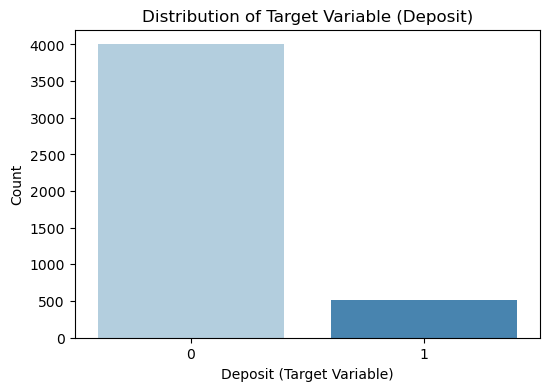

Class distribution in the target variable:
0    4000
1     521
Name: y, dtype: int64
Minority class percentage: 11.52%
Majority class percentage: 88.48%
The dataset is imbalanced


In [70]:
# Check the class distribution of the target variable 'y' for deposit
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='Blues')
plt.title('Distribution of Target Variable (Deposit)')
plt.xlabel('Deposit (Target Variable)')
plt.ylabel('Count')
plt.show()

# Print the count of each class in the target variable
class_counts = df['y'].value_counts()
print(f"Class distribution in the target variable:\n{class_counts}")

# Check if the dataset is balanced or not
total_count = len(df)
minority_class_percentage = (class_counts.min() / total_count) * 100
majority_class_percentage = (class_counts.max() / total_count) * 100

print(f"Minority class percentage: {minority_class_percentage:.2f}%")
print(f"Majority class percentage: {majority_class_percentage:.2f}%")

if minority_class_percentage < 40:
    print("The dataset is imbalanced")
else:
    print("The dataset appears to be balanced")

In [52]:
# Find any missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

if features_na:
    for feature in features_na:
        missing_percentage = np.round(df[feature].isnull().mean() * 100, 4)  # Calculate percentage of missing values
        print(f"{feature}: {missing_percentage}% missing values")
else:
    print("No missing values found")

No missing values found


In [53]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [34]:
# Show number of categories per Feature Quantitatively

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


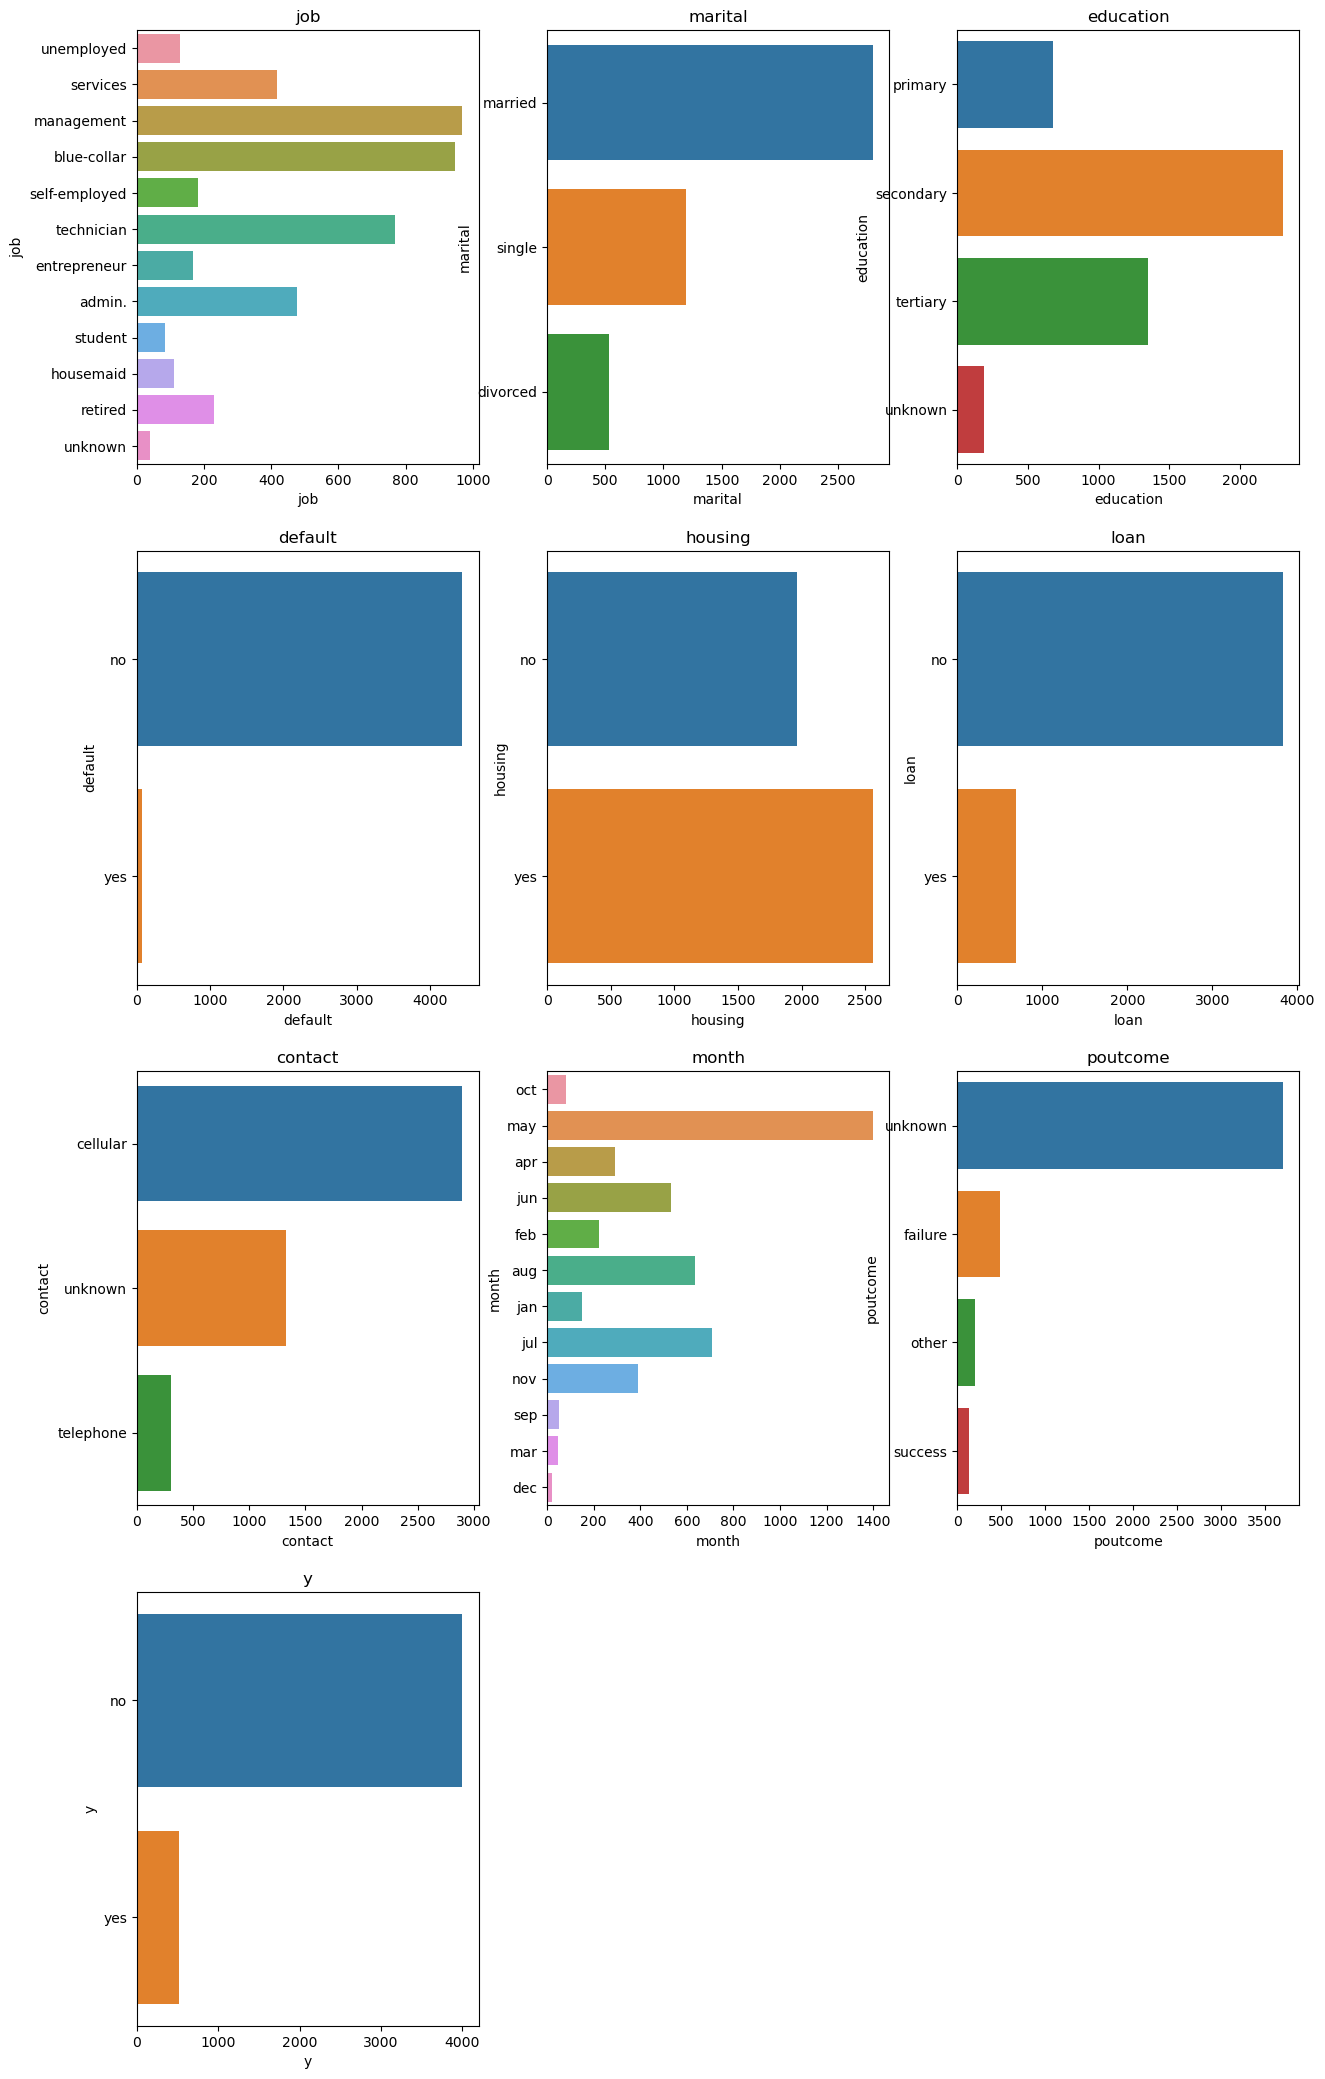

In [35]:
# Display the count of each category for each Feature
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

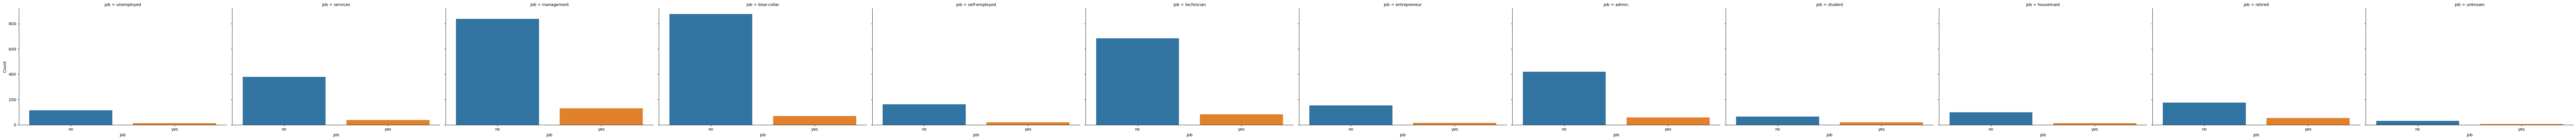

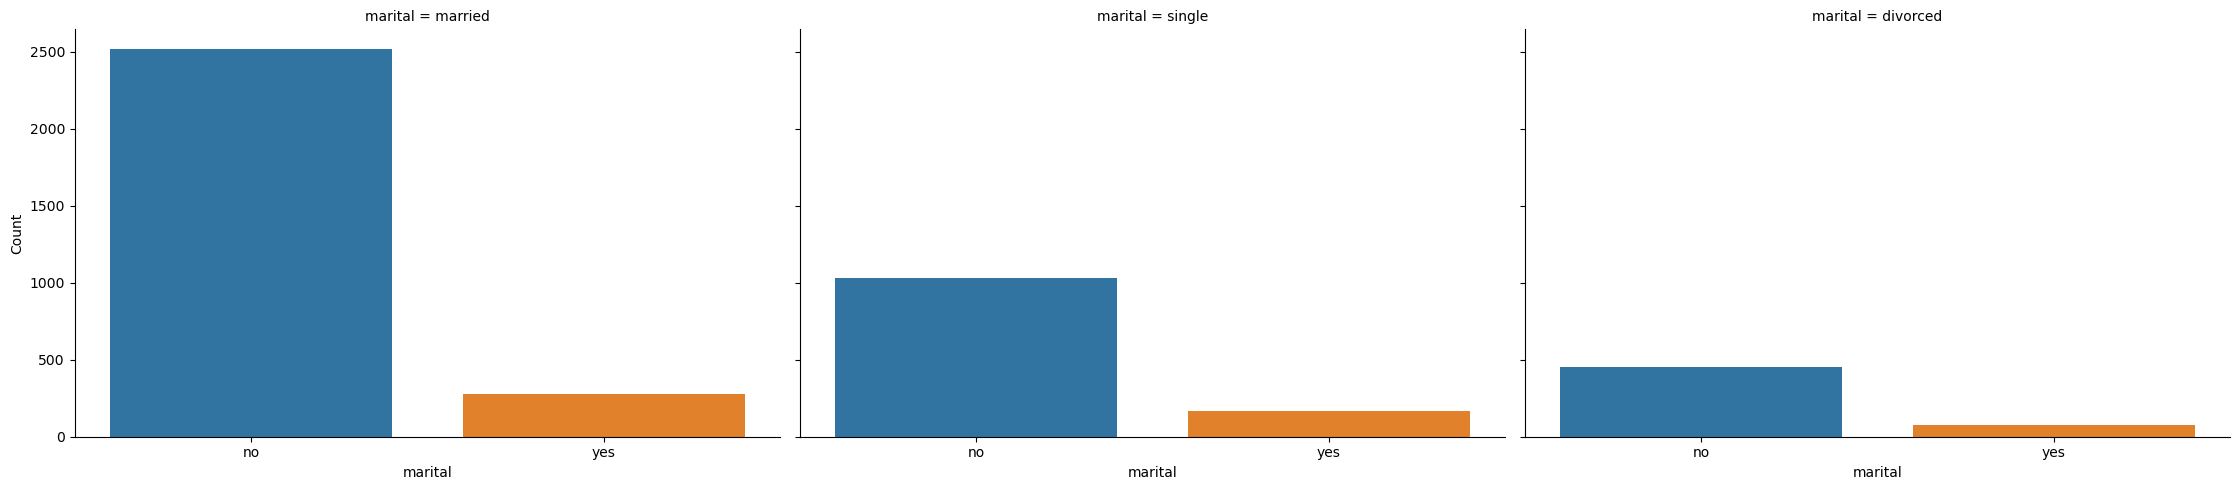

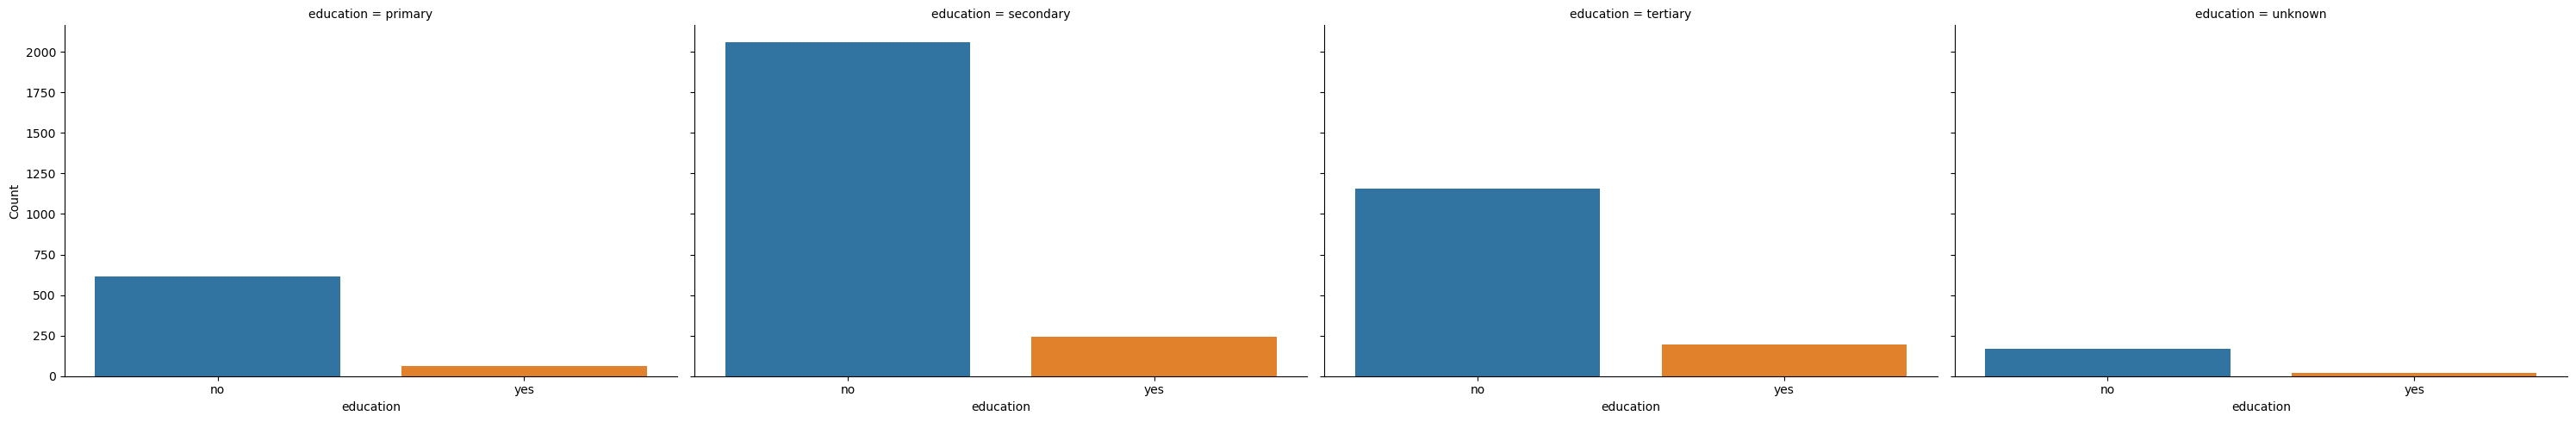

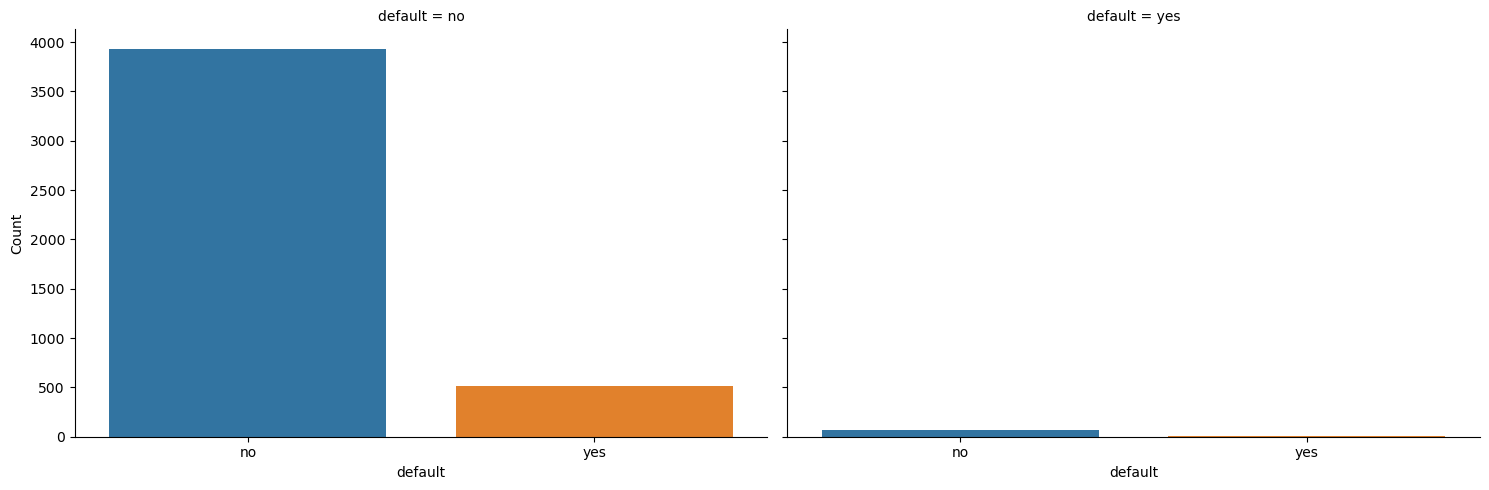

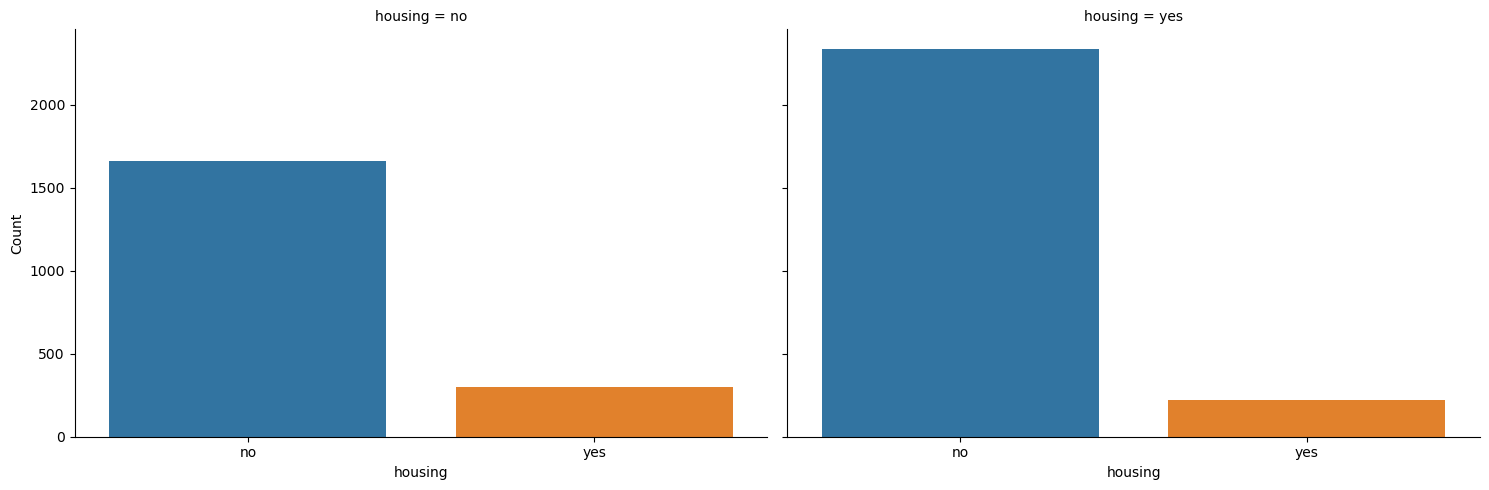

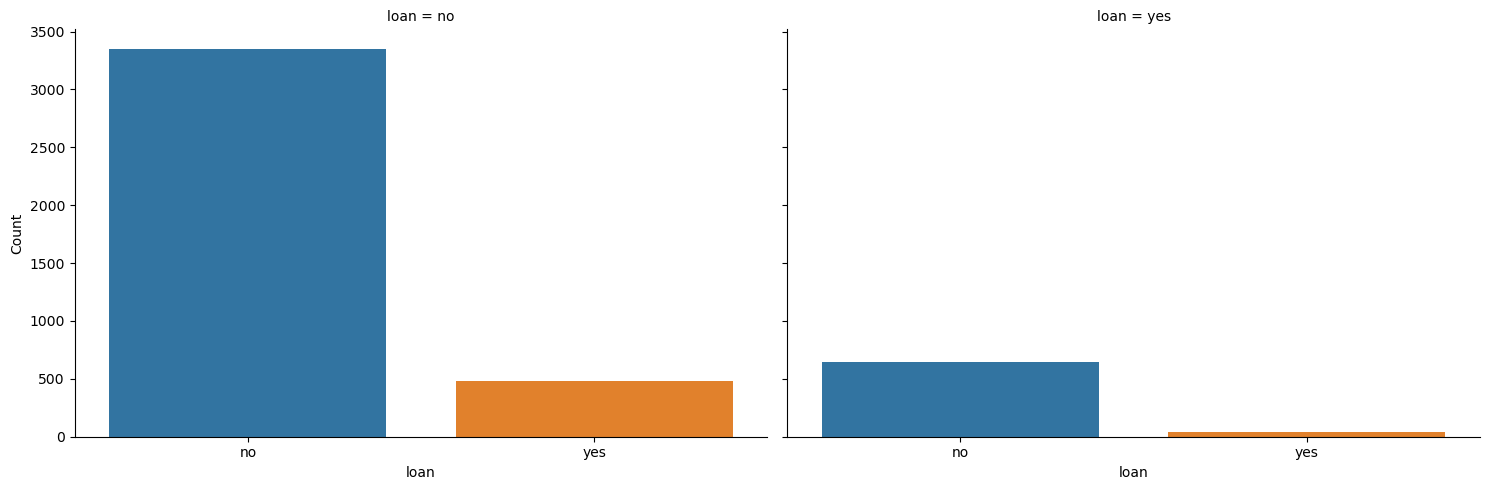

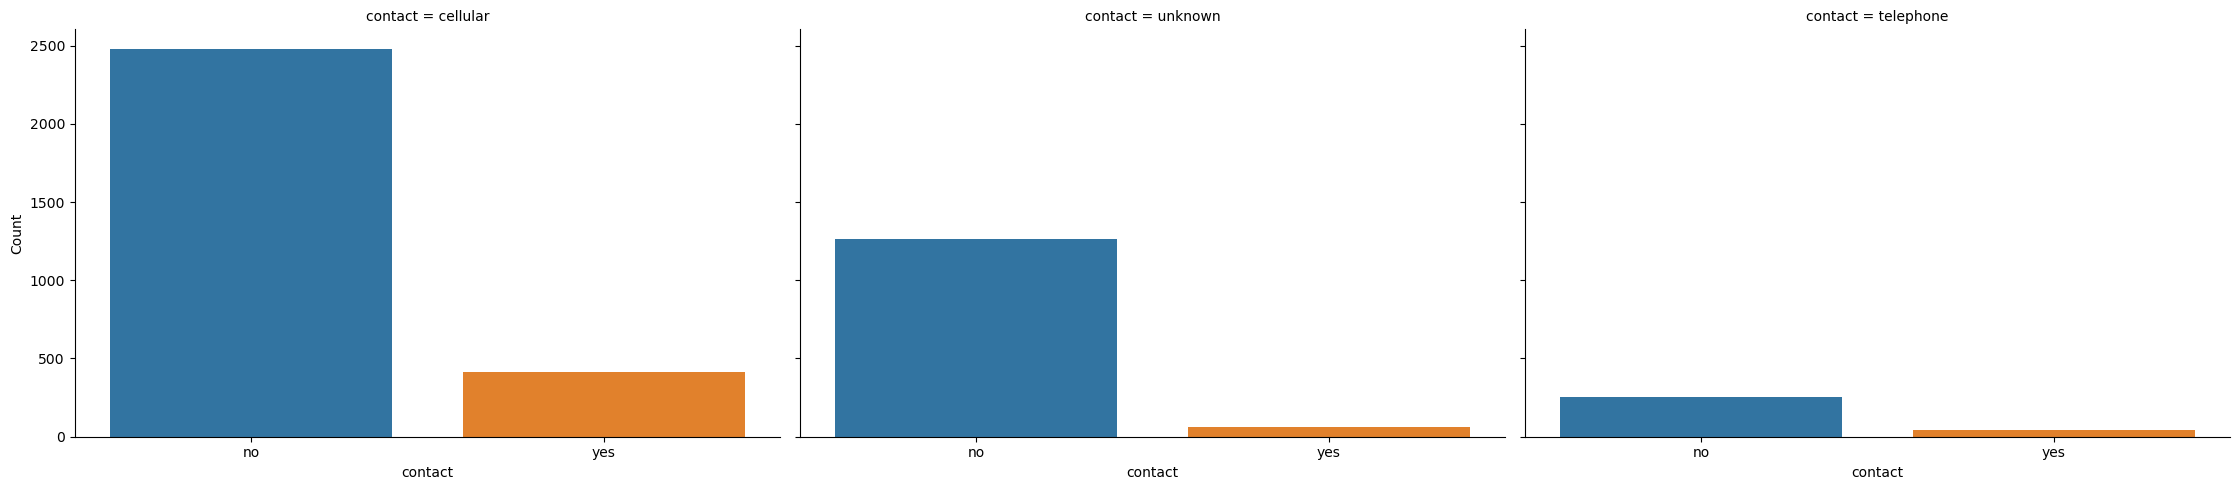

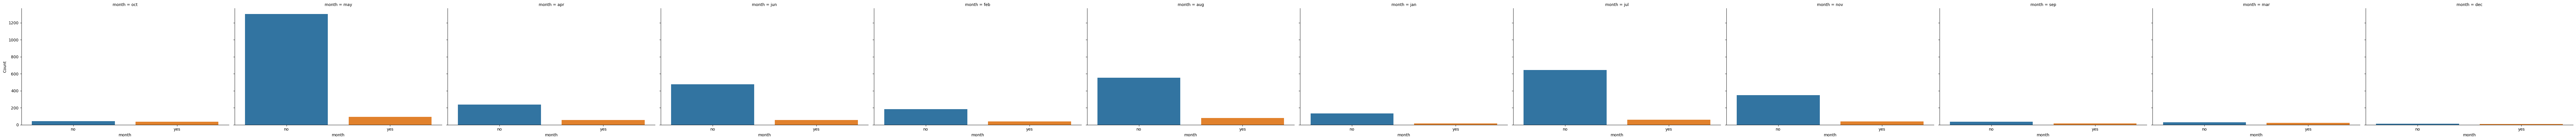

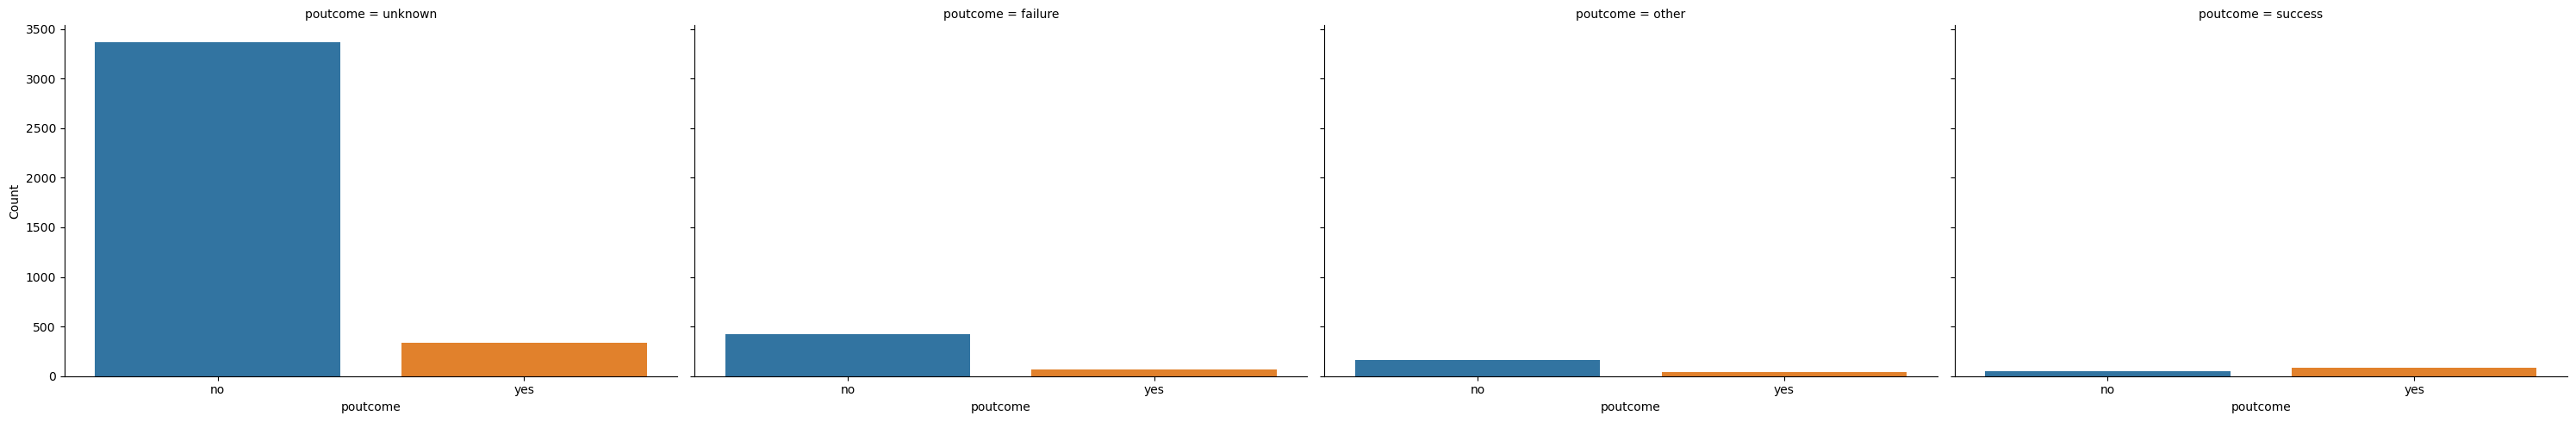

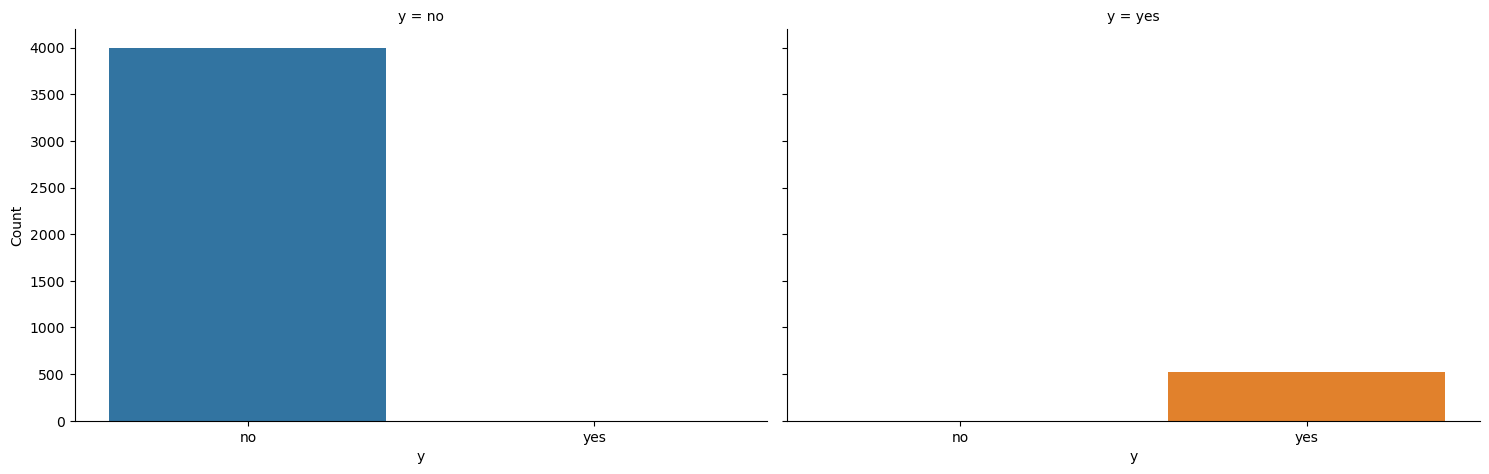

In [58]:
# Perform cross-analysis between the target label 'deposit (y)' and categorical features
# Visualize the relationship by showing the distribution of 'deposit' across each category

for categorical_feature in categorical_features:
    g = sns.catplot(x='y', col=categorical_feature, kind='count', data=df, height=5, aspect=1.5)
    g.set_axis_labels(categorical_feature, 'Count')

plt.subplots_adjust(top=0.9)  


In [60]:
# Display quantiatively the count for each cross-analysis
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

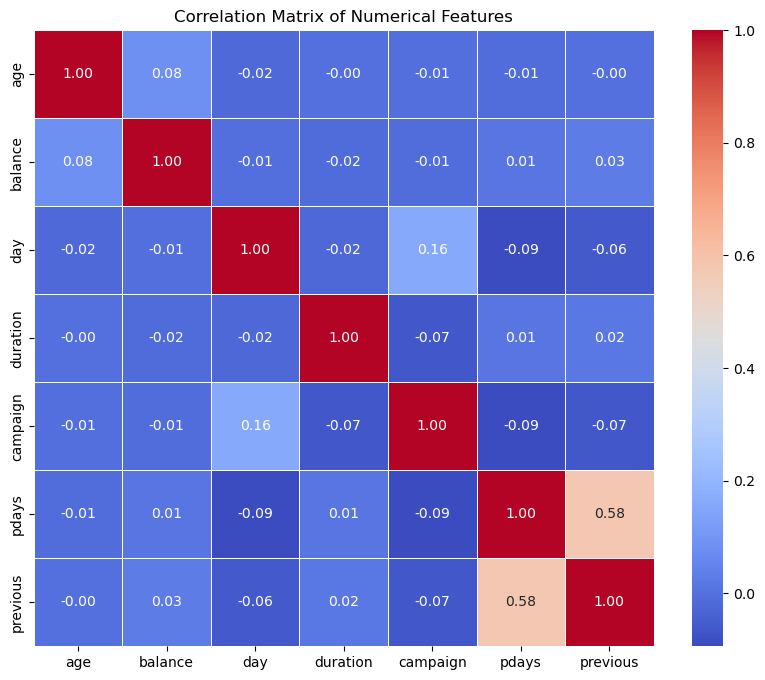

In [61]:
# Select numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


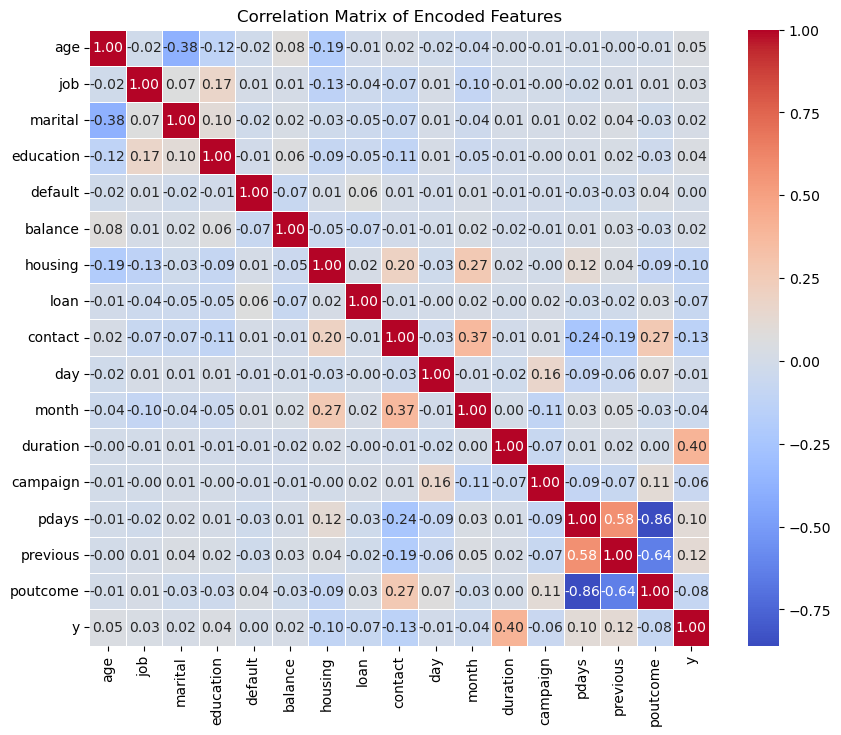

In [62]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns into numeric values
categorical_features = df.select_dtypes(include=[object]).columns
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

correlation_matrix = df.corr()

# Plot the heatmap for the encoded features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Encoded Features')
plt.show()


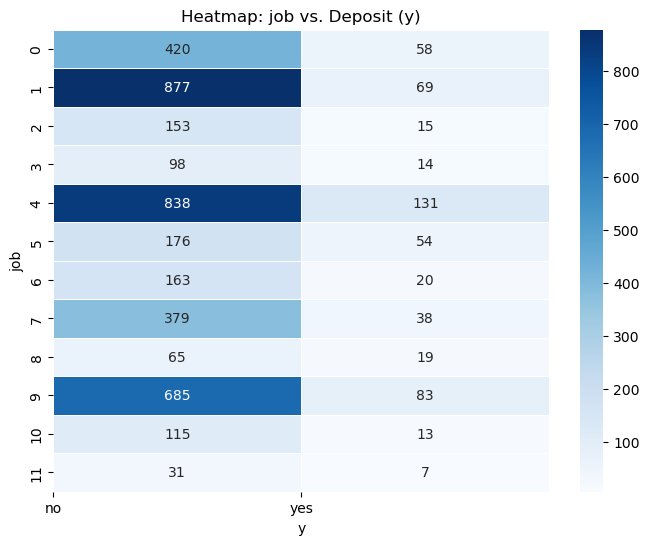

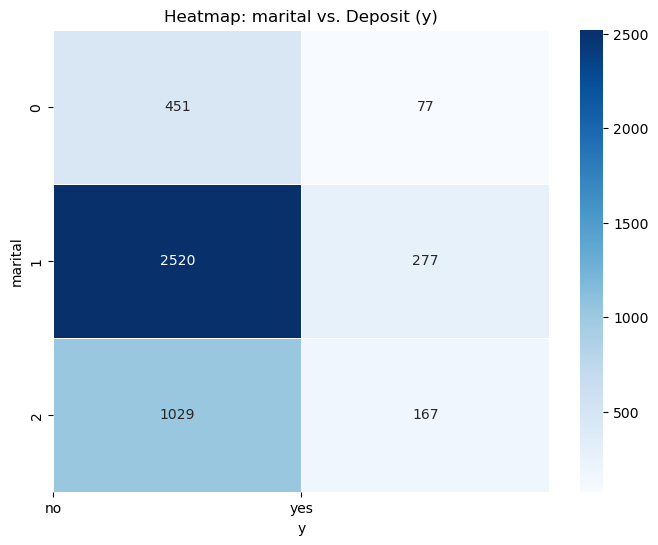

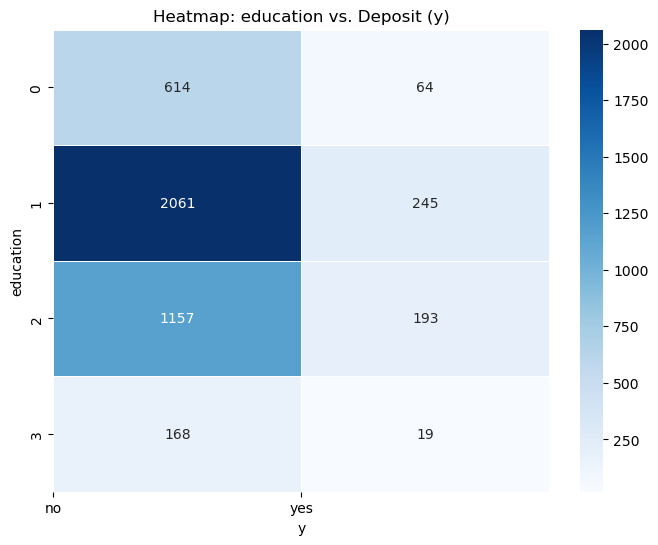

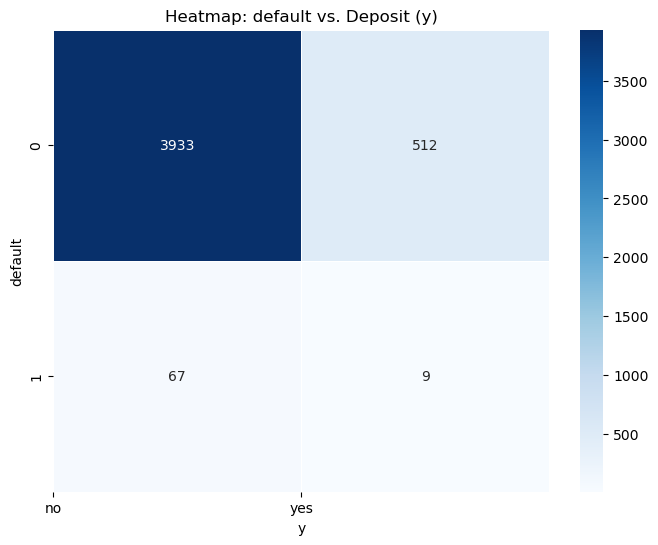

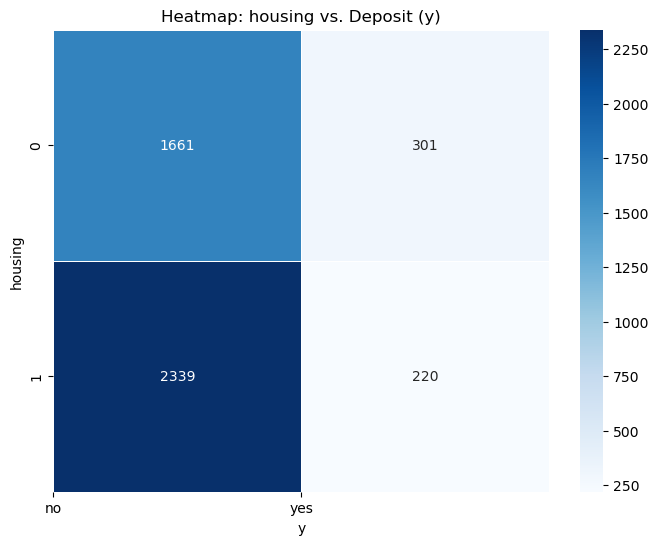

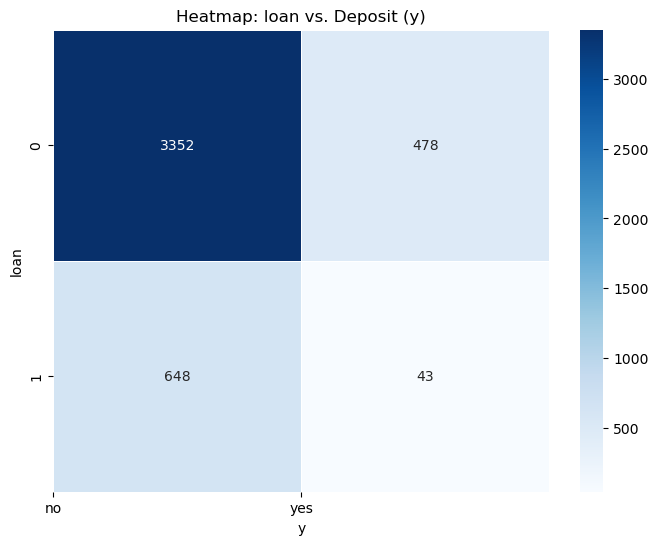

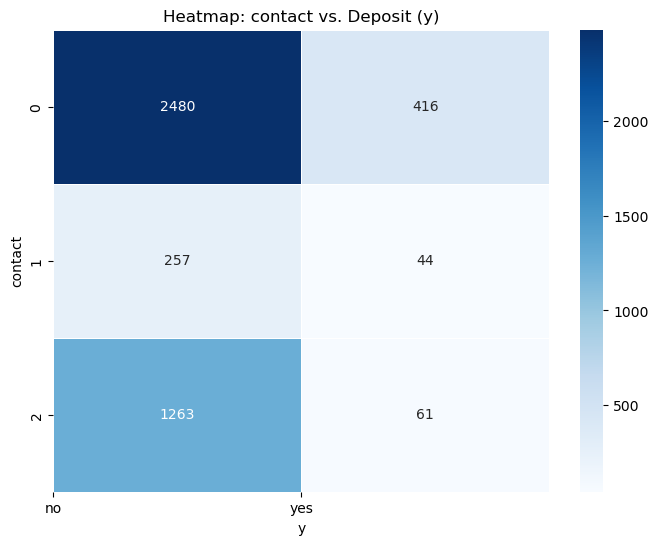

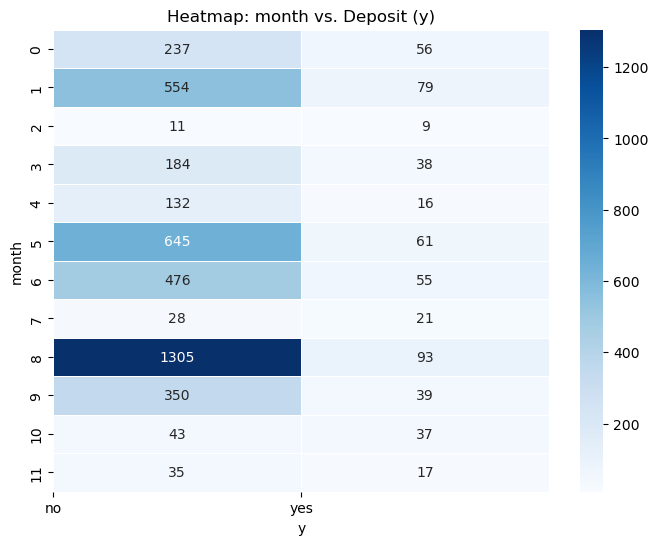

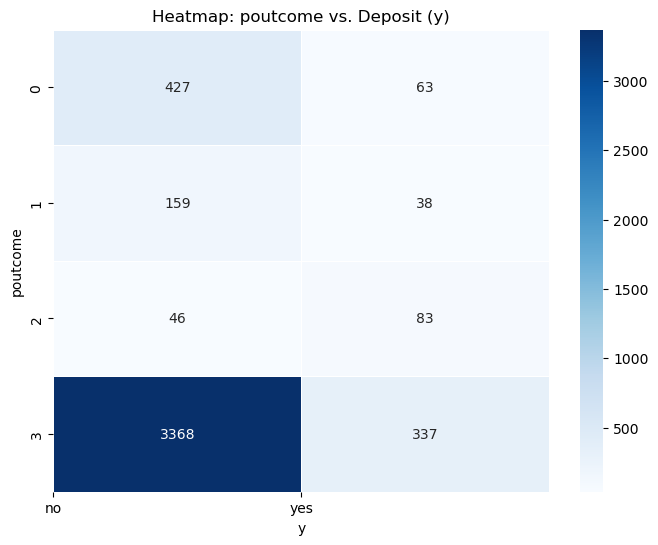

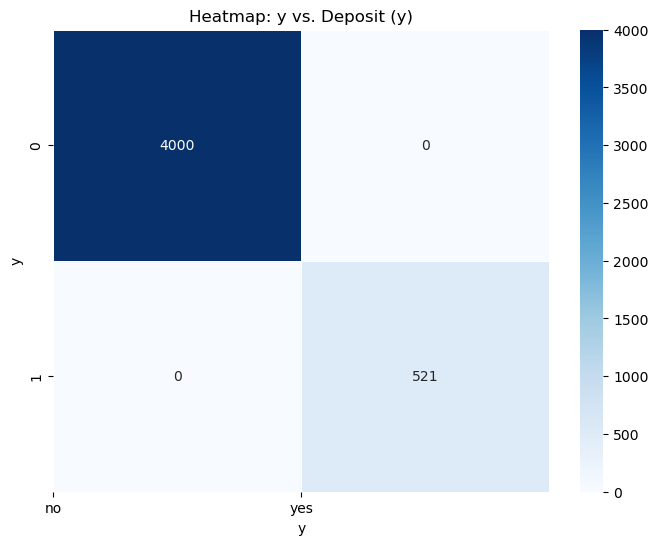

In [67]:
# Cross-tabulation of categorical features with the target variable 'y'
for categorical_feature in categorical_features:
    crosstab = pd.crosstab(df[categorical_feature], df['y'])
    
    # Plot heatmap for each feature's relationship with 'y'
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
    
    # Set x-axis labels to 'no' and 'yes' instead of 0 and 1
    plt.xticks(ticks=[0, 1], labels=['no', 'yes'], rotation=0)
    
    plt.title(f'Heatmap: {categorical_feature} vs. Deposit (y)')
    plt.show()


Outliers in age:
Row 36: 78
Row 129: 77
Row 166: 78
Row 199: 75
Row 412: 75
Row 477: 77
Row 573: 81
Row 633: 83
Row 688: 80
Row 1126: 77
Row 1230: 75
Row 1312: 80
Row 1349: 83
Row 1415: 75
Row 1422: 79
Row 1437: 77
Row 1866: 86
Row 1949: 78
Row 1956: 77
Row 2014: 74
Row 2070: 80
Row 2678: 74
Row 2848: 80
Row 2896: 80
Row 3157: 75
Row 3193: 76
Row 3202: 79
Row 3205: 77
Row 3311: 87
Row 3360: 79
Row 3495: 76
Row 3690: 80
Row 3750: 79
Row 3786: 74
Row 4047: 75
Row 4108: 84
Row 4323: 83
Row 4388: 83
----------------------------------------
Outliers in balance:
Row 1: 4789
Row 10: 9374
Row 16: 4073
Row 25: 5883
Row 30: 4189
Row 38: 3935
Row 40: 11971
Row 49: 4629
Row 62: 5887
Row 64: 16873
Row 72: 6248
Row 93: 3616
Row 94: 14093
Row 96: 5426
Row 102: 5996
Row 103: 3777
Row 117: 4111
Row 129: 4659
Row 139: 6313
Row 153: 8104
Row 161: 4590
Row 174: 9009
Row 176: 5181
Row 182: 6979
Row 194: 9216
Row 196: 5563
Row 199: 3771
Row 210: 9149
Row 213: 11494
Row 221: 4030
Row 238: 7082
Row 241: 4012


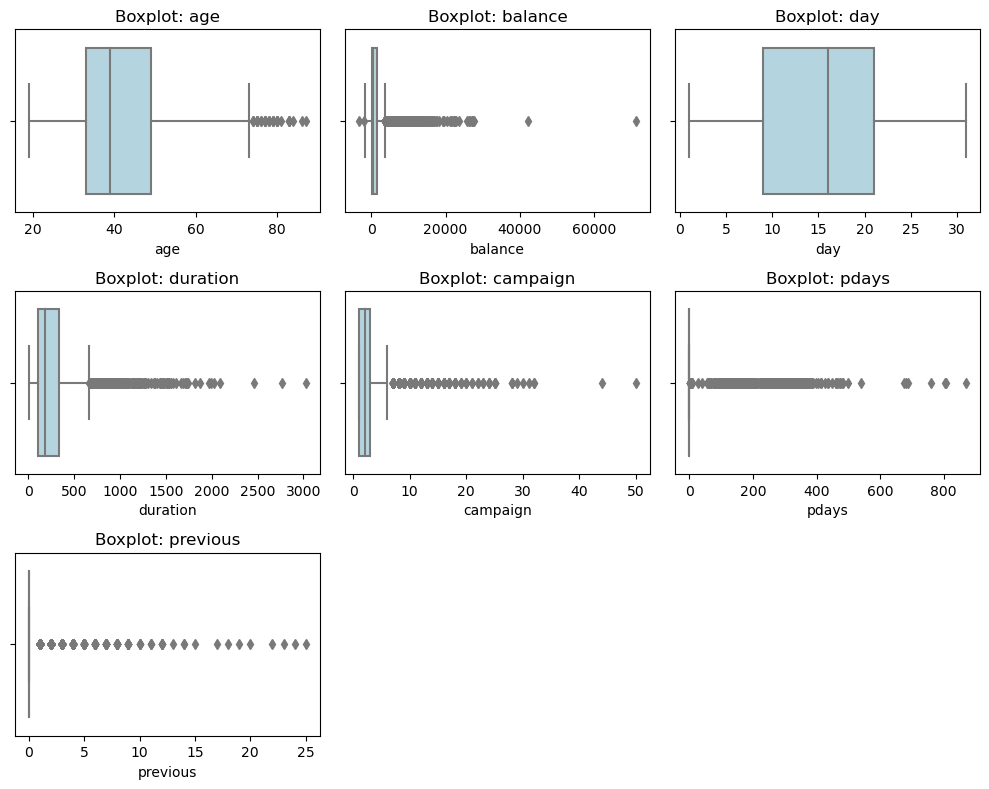

In [74]:
# Boxplot to identify potential outliers for numerical features and print outliers with row indices and values
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust number of rows and columns based on the number of features
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot: {feature}')
    
    # Calculate IQR for the feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier threshold
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    
    # Print outliers with row indices and values
    if not outliers.empty:
        print(f'Outliers in {feature}:')
        for index, value in outliers.items():
            print(f'Row {index}: {value}')
        print('-' * 40)

plt.tight_layout()
plt.show()


DATASET SPLITTING

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target variable (y)
X = df.drop(['y'], axis=1) 
y = df['y']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the lengths of train and test sets
print(f"Length of training set: {len(X_train)}")
print(f"Length of test set: {len(X_test)}")

Length of training set: 3616
Length of test set: 905


MODEL TRAINING

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=0)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Print the training score (accuracy)
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")


Training accuracy: 1.0000


MODEL TESTING

In [79]:
# Test the model on the test data
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.8939


In [ ]:
CLASSIFICATION REPORT

In [80]:
from sklearn.metrics import classification_report

# Generate the classification report
y_pred = rf_model.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       793
           1       0.64      0.33      0.44       112

    accuracy                           0.89       905
   macro avg       0.77      0.65      0.69       905
weighted avg       0.88      0.89      0.88       905



CONFUSION MATRIX

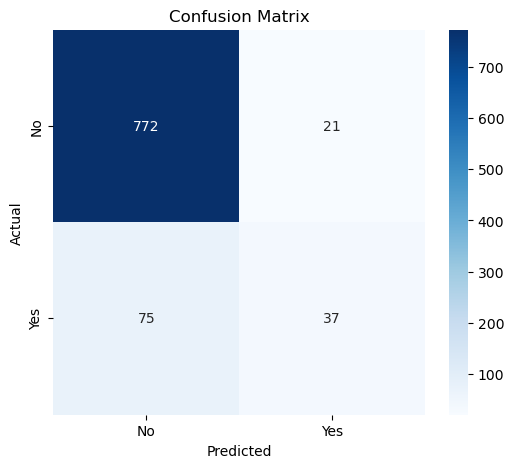

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC-ROC (Receiver Operating Characteristic)

AUC-ROC score: 0.9134


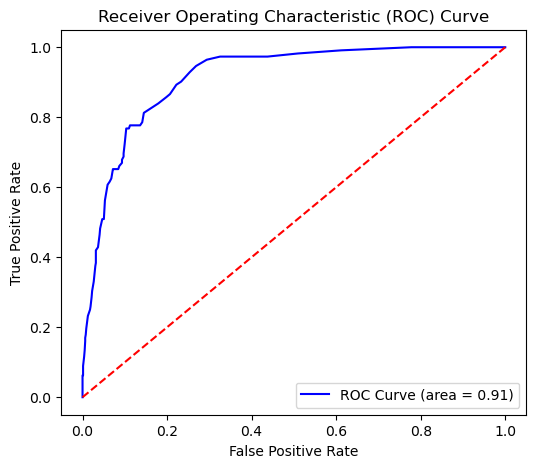

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC score: {auc_score:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='b', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
